In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
dc = pd.read_csv("/home/ksenia/Python/Task_8/dogs_n_cats.csv")

In [25]:
dc.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [24]:
dc.groupby("Вид").aggregate(["count"])

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
,count,count,count,count,count
Вид,,,,,
котик,500,500,500,500,500
собачка,500,500,500,500,500


In [26]:
#split dataset in features and target variable

feature_cols = ['Длина', 'Высота', 'Шерстист', 'Гавкает','Лазает по деревьям']
label = ['Вид']
x = dc[feature_cols] # Features
y = dc[label] # Target variable

In [27]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

In [30]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

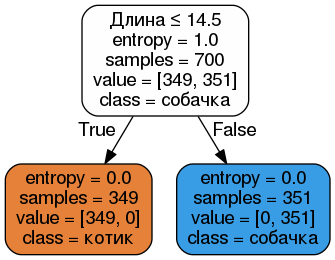

In [31]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['котик','собачка'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dc.png')
Image(graph.create_png())

In [35]:
import json

with open("/home/ksenia/Python/Task_8/dataset_209691_15.json" , "r") as f:
    data = json.load(f)
df = pd.DataFrame(data) 
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,34,40.8,1,1,0
10,23,27.6,1,1,0
11,23,27.6,1,1,0
12,20,24.0,1,0,0


In [33]:
y1 = clf.predict(df)

In [34]:
df2 = df
df2["Вид"] = y1
df2.groupby("Вид").aggregate(["count"])

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
,count,count,count,count,count
Вид,,,,,
котик,54,54,54,54,54
собачка,46,46,46,46,46
